In [24]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [25]:
df_iris = load_iris(as_frame=True).frame
X = df_iris[ ['petal length (cm)', 'petal width (cm)'] ]
y = df_iris.target

In [26]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

In [28]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
class KNN:
    """Clasificador KNN.

    Parámetros
    ------------
    k : int
        número de vecinos cercanos
    p : int
        valor para selección de métrica (1: Manhattan, 2: Euclídea)
    """

    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def distancia(self, vec_1, vec_2, p=2):
        dim = len(vec_1)
        distance=0

        for d in range(dim):
            distance += (abs(vec_1[d]-vec_2[d]))**p

        distance = (distance)**(1/p)
        return distance

    def fit(self, X, y):
        """Entrenamiento del clasificador kNN, es un algoritmo 'perezoso'
        sólo almacena los datos y sus etiquetas
        Parameters
        ----------
        X : array
            vector de características.
        y : array
            clases asociadas a los datos.
        """
        self.X = np.array(X)
        self.y = np.array(y)
        self.n_datos = X.shape[0]

    def predict(self, x):
        """Función que realiza la predicción.
        Parameters
        ----------
        x : array
            vector de patrones de entrada.

        Returns
        -------
        vector de predicciones.
        """
        y_pred = []

        for punto_prueba in x:
            #----------------------------------
            distancias = np.empty(self.n_datos)

            for n in range(self.n_datos):
                distancias[n] = self.distancia(punto_prueba, self.X[n, :])

            # Obtener los índices de las k menores distancias
            k_indices = np.argsort(distancias)[:self.k]

            # Obtener las etiquetas correspondientes a los k vecinos más cercanos
            k_etiquetas = self.y[k_indices]

            # Contar las etiquetas más comunes
            c = Counter(k_etiquetas).most_common(1)

            # Añadir la etiqueta más común a las predicciones
            y_pred.append(c[0][0])
            #----------------------------------
        return np.asarray(y_pred) #predicciones

In [30]:
# Creamos un objeto knn usando la clase implementada
knn = KNN(k=3)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_train_std, y_train)

In [31]:
# Evaluamos el clasificador con los datos de prueba
y_pred = knn.predict(X_test_std)
# Comparamos nuestra predicción con los targets
(y_pred==y_test).sum()

np.int64(45)

In [32]:
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=knn, test_idx=range(105, 150), resolution=0.05)
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'modulos'

In [ ]:
y_pred = knn.predict(X_test_std)

In [ ]:
def accuracy(y_pred, y_test):
    return np.sum( np.equal(y_pred, y_test) ) / len(y_test)

print(accuracy(y_pred, y_test))


1.0


In [ ]:
df_prestamos = pd.read_csv("d:/Users/Laura/Desktop/Aprendizaje_Maquinal/AM_Introduccion_KNN/1_datos/prestamos.csv", index_col=False)
df_prestamos.head()


,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado
0,12.62,36,690.0,694.0,18.75,pagado
1,16.99,36,670.0,674.0,24.54,pagado
2,10.15,36,700.0,704.0,6.95,pagado
3,6.89,36,740.0,744.0,7.78,pagado
4,10.42,60,730.0,734.0,18.84,pagado


In [ ]:
df_prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134531 entries, 0 to 134530
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tasa de interes       134531 non-null  float64
 1   plazo prestamo        134531 non-null  int64  
 2   fico limite inferior  134531 non-null  float64
 3   fico limite superior  134531 non-null  float64
 4   deudas_ingresos       134503 non-null  float64
 5   estado                134531 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


### separamos los datos para entrenar y prueba

In [16]:
# Antes de continuar hacemos una copia del conjunto de entrenamiento
prestamos = train_set.copy()

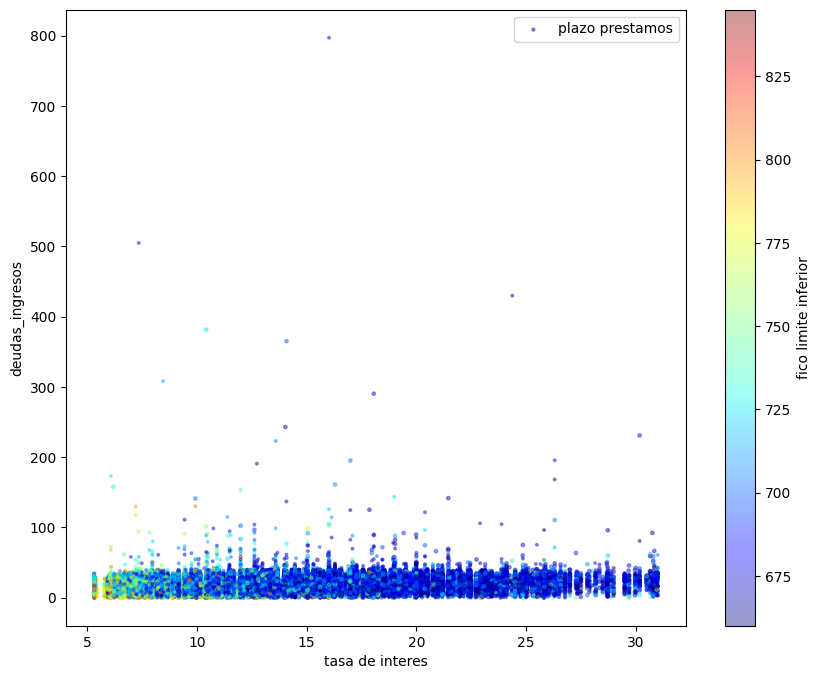

In [23]:
#prueba
prestamos.plot(kind="scatter", x = "tasa de interes", y = "deudas_ingresos", alpha=0.4,
              s = prestamos["plazo prestamo"]/10 , label="plazo prestamos", c="fico limite inferior",
              cmap="jet", colorbar = True, legend = True, sharex = False, figsize=(10,8))
plt.show()